In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sea
import datetime as dt
import warnings

# Ignoring the warnings
warnings.filterwarnings('ignore') 

In [2]:
#Load the dataset in to df
df = pd.read_csv('loan.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3]:
# Checking header using head() with the initial 5 rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Getting the Dimensions of the entire dataset loaded in the dataframe to get the initial idea for data analysis
# Shape() function used for dimensions
df.shape

(39717, 111)

### Data Cleaning and Imputations

In [5]:
# Checking for total rows with the unique loan_status available in the df
total_rows=len(df)
total_rows

39717

##### Removing unwanted data

In [6]:
# Unique Loan status with counts
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [7]:
#  We can get rid off loan_status of 'CURRENT' as it serves no purpose as the loan is already granted and we may not be able to conclude in case if the customer may defaults to pay.
#  So dropping those rows 
df= df[df.loan_status != 'Current']

# Display Total Count
print("Total Rows:",len(df))


Total Rows: 38577


In [8]:
# % of rows reduced
rows_deleted=((total_rows - len(df)) * 100)/total_rows
print("% of Rows Dropped:",round(rows_deleted,2))

(df.isna().sum()/len(df.index)) * 100

% of Rows Dropped: 2.87


id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [9]:
# Checking the dimension of the dataframe 
df.shape

(38577, 111)

In [10]:
# Checking for Null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

In [11]:
#Checking for the Null value percentage
(df.isnull().sum()*100)/len(df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [12]:
# This clearly states that we can drop Null or Missing value columns from the df, So we can drop them:
print("Columns count with NULL/Missing Values : ", len(df.columns[df.isna().all()].tolist()))
na_col=list(df.columns[df.isna().all()])
print("Null Col List:")
na_col

Columns count with NULL/Missing Values :  55
Null Col List:


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [13]:
# Dropping columns having NA 
df = df.dropna(axis = 1, how = "all")
df.shape

(38577, 56)

In [14]:
#Checking remaining columns: 
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='o

##### Deleting columns with value as 1 as it does not contribute in EDA 

In [15]:
#checking dimension again
df.shape

(38577, 56)

In [16]:
for cols in df.columns:
    if df[cols].nunique(dropna=True) == 1:
        print(cols)
        df = df.drop(cols, axis=1)

pymnt_plan
initial_list_status
out_prncp
out_prncp_inv
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


In [17]:
df.shape

(38577, 45)

##### Now we have 45 columns out of which some correspond to the post approval of loan

- The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

- So we can safely remove the columns which are not needed for the EDA.

- Also removing those columns which doesn't contribute to identify loan defaulting such as 'id', 'member_id', 'zip_code', 'last_credit_pull_d'.

- Removing non contributing textual field 'url', 'title', 'emp_title', 'desc'

- 'out_prncp_inv' , 'total_pymnt_inv ', etc.. are not useful contributing to the loan defaulting analysis. So removing them.

In [18]:
# Further dropping non contributing to EDA
non_cont_cols = ['id', 'member_id', 'url', 'desc', 'title', 'emp_title', 'sub_grade', 'delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 
                 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                 'last_pymnt_d','last_credit_pull_d','mths_since_last_delinq', 'mths_since_last_record']

df = df.drop(non_cont_cols, axis=1)

In [19]:
# Checking the remaining columns in dataframe
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [20]:
df.shape

(38577, 18)

# Preparing the data for analysis

### Now lets check the data types and clean them as needed

In [21]:
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

#### Checking and Cleaning/Deleting the columns as per above list

In [22]:
# Now Convert 'Term' from string to int
df['term'] = df['term'].apply(lambda term: int(term.strip().split()[0]))
df['term'].dtype


dtype('int64')

In [23]:
df['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [24]:
# Converting int_rate to float.
df['int_rate']= df['int_rate'].str.strip('%').astype(float)

In [25]:
df['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
17.34      1
16.71      1
16.15      1
18.36      1
14.67      1
Name: count, Length: 370, dtype: int64

In [26]:
# Next-> Converting loan_funded_amnt and funded_amnt to float
df = df.assign(loan_amnt=df['loan_amnt'].astype(float), funded_amnt=df['funded_amnt'].astype(float))
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500.0,2500.0,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,8500.0,8500.0,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,5000.0,5000.0,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,5000.0,5000.0,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [27]:
# check grade dattype.
df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [28]:
df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [29]:
# Now, below float columns - Rounding off to 2 decimal points
for col in ['loan_amnt', 'int_rate', 'dti']:
    df[col] = df[col].apply(lambda x: round(x,2))
    print(df[col])

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
         ...  
39712    11.33
39713     6.40
39714     2.30
39715     3.72
39716    14.29
Name: dti, Length: 38577, dtype: float64


In [30]:
#Date Type conversion 
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y', errors='coerce')
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [31]:
(df.isnull().sum()*100)/len(df)

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [32]:
# Further filtering the NA rows for emp_length and pub_rec_bankruptcies columns as number of null rows are very less
tot_rows_bef = len(df)
df= df[df.emp_length.notna()]
df= df[df.pub_rec_bankruptcies.notna()]

In [33]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800.0,4800.0,1100.0,36,10.28,155.52,C,1 year,RENT,35000.0,Not Verified,2007-11-01,Fully Paid,debt_consolidation,226xx,VA,7.51,1.0
39573,7000.0,7000.0,1000.0,36,10.59,227.82,C,3 years,MORTGAGE,63500.0,Not Verified,2007-11-01,Fully Paid,debt_consolidation,853xx,AZ,8.50,1.0
39623,9000.0,9000.0,700.0,36,12.49,301.04,D,8 years,MORTGAGE,39000.0,Not Verified,2007-10-01,Charged Off,debt_consolidation,207xx,MD,5.08,1.0
39666,15450.0,15450.0,600.0,36,11.22,507.46,C,2 years,MORTGAGE,40000.0,Not Verified,2007-08-01,Charged Off,debt_consolidation,201xx,VA,13.50,1.0


In [34]:
tot_del= ((tot_rows_bef-len(df))*100)/tot_rows_bef
print("% of rows Deleted:",round(tot_del,2))
df.shape

% of rows Deleted: 4.48


(36847, 18)

In [35]:
#Final check for NA in the df

(df.isnull().sum() * 100) / len(df) 

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [36]:
# Now stripping the columns with string values - Years, <, + and blank spaces
df['emp_length'] = df['emp_length'].apply(lambda x: x.strip("years").strip("<").replace(" ", "").replace("+", ""))
print(df['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


### Univariate Analysis


#### Grouping varaibles for better understanding and analysis

In [37]:
# Grouping Loan Amount for meaningful ranges
df['loan_amnt_b'] = df['loan_amnt'].apply(
    lambda x: '0 - 5K' if x <= 5000 else 
              '5K - 10K' if 5000 < x <= 10000 else 
              '10K - 15K' if 10000 < x <= 15000 else 
              '15K - above'
)


In [70]:
# Grouping Annual Income for meaningful ranges
df['annual_inc_b'] = df['annual_inc'].apply(
    lambda x: '0 - 40k' if x <= 40000 else
              '40k - 50k' if 40000 < x <= 50000 else
              '50k - 60k' if 50000 < x <= 60000 else
              '60k - 70k' if 60000 < x <= 70000 else
              '70k - 80k' if 70000 < x <= 80000 else
              '80k - above'
)


In [71]:
# Grouping Interest Rate for meaningful ranges 

df['int_rate_b'] = df['int_rate'].apply(
    lambda x: 'Very Low (< 9)' if x <= 9 else
              'Low (9 - 11)' if 9 < x <= 11 else
              'Moderate (11 - 13)' if 11 < x <= 13 else
              'High (13 - 15)' if 13 < x <= 15 else
              'Very High  (> 15)'
)


In [72]:
# Grouping DTI for meaningful ranges 
df['dti_b'] = df['dti'].apply(
    lambda x: 'Very Low' if x <= 8 else
              'Low' if 8 < x <= 12 else
              'Moderate' if 12 < x <= 16 else
              'High' if 16 < x <= 20 else
              'Very High'
)


In [73]:
# Refering Metadata Definition for using labels/Legends on graph plots

col_Titles = {
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'loan_amnt': 'Loan Amount',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income',
    'annual_inc_b': 'Annual Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'loan_amnt_b': 'Loan Amount Bin',
    'int_rate_b': 'Interest Rate Bin',
    'dti_b': 'DTI Bin'    
}

In [74]:
# Creating a function to generate graph
def plt_graph(dfrm, column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sea.distplot(dfrm.loc[dfrm[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=dfrm, ax=p[1])
    p[0].set_xlabel(col_Titles[column])
    p[1].set_xlabel(col_Titles[column])
    plt.tight_layout()
    plt.show()

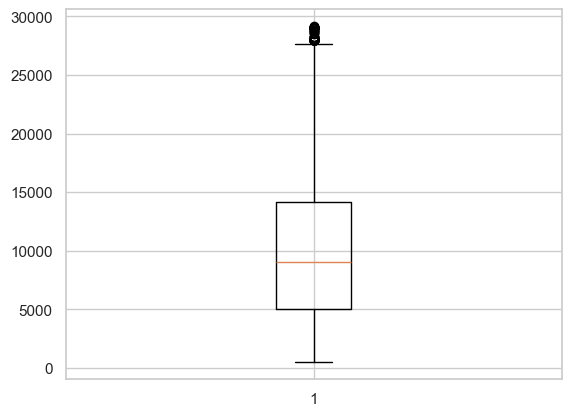

In [75]:
plt.boxplot(df['loan_amnt'])
plt.show()


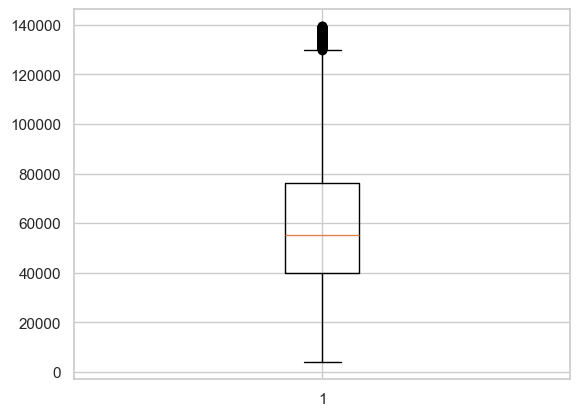

In [76]:
plt.boxplot(df['annual_inc'])
plt.show()

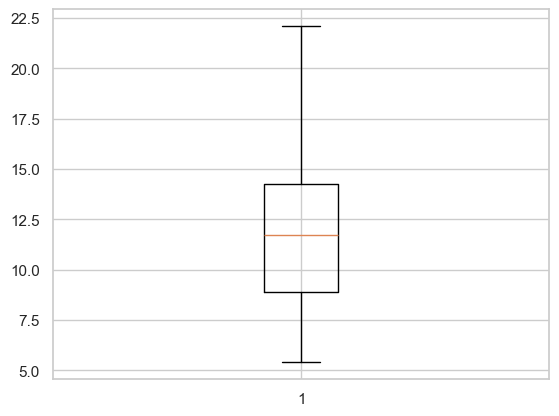

In [77]:
plt.boxplot(df['int_rate'])
plt.show()

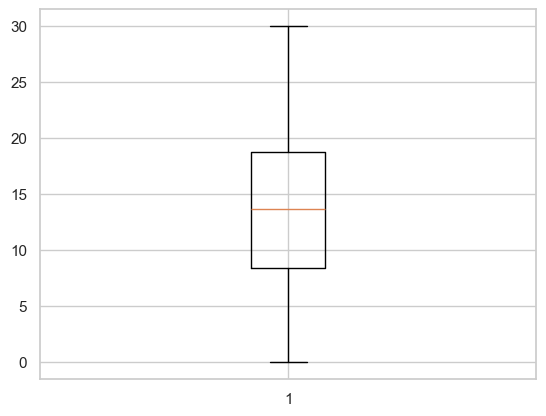

In [78]:
plt.boxplot(df['dti'])
plt.show()

##### Finding Outliers and removing them using Quantile method

In [79]:
# As we can see that outliers exists for the columns -> 'loan_amnt', 'int_rate', 'installment', 'annual_inc'
# Let us remove the outlier:->

outliers_cols = ['loan_amnt','annual_inc', 'int_rate','dti']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

In [80]:
# Remove outliers from the DataFrame
df =remove_outliers_iqr(df, outliers_cols,1.5)

In [81]:
# Lets check the plts again for the outliers

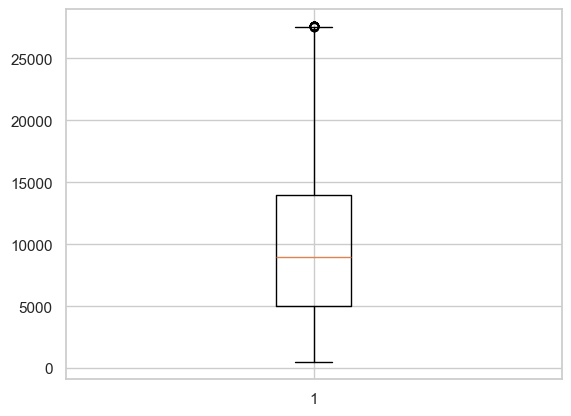

In [82]:
plt.boxplot(df['loan_amnt'])
plt.show()

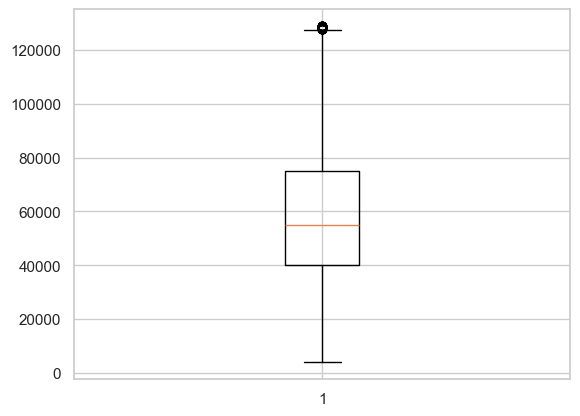

In [83]:
plt.boxplot(df['annual_inc'])
plt.show()

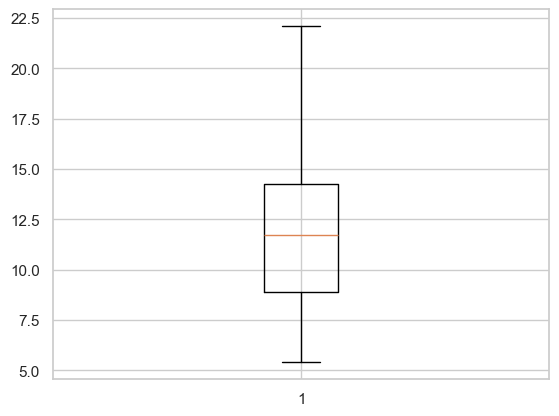

In [84]:
plt.boxplot(df['int_rate'])
plt.show()

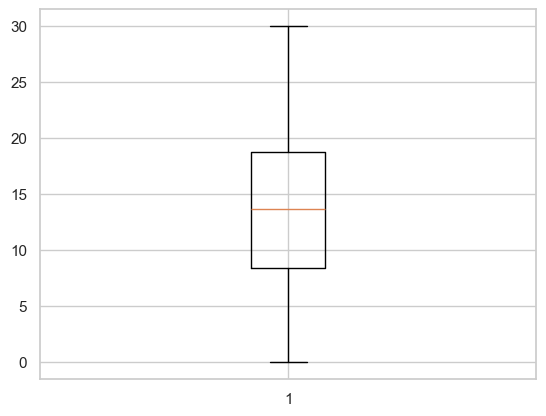

In [85]:
plt.boxplot(df['dti'])
plt.show()

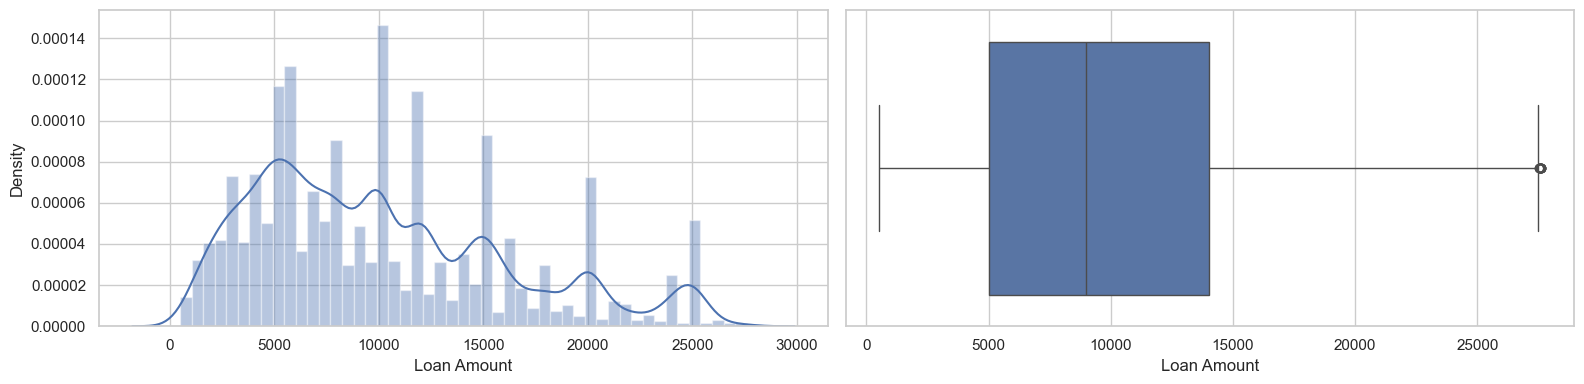

count    33342.000000
mean     10079.833243
std       6109.140473
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      27600.000000
Name: loan_amnt, dtype: float64

In [86]:
# Loan Amount
plt_graph(df, 'loan_amnt')
df['loan_amnt'].describe()

### Observation:
#### Most of the loan amount applied was in the range of 5K - 14K
#### Max Loan amount applied was around 27K

##### Creating Derived Column below:

In [87]:
#create new column YEAR from the existing column
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')  
df['year'] = df['issue_d'].dt.year
df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,loan_amnt_b,annual_inc_b,int_rate_b,dti_b,year
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,10,RENT,24000.0,...,credit_card,860xx,AZ,27.65,0.0,0 - 5K,0 - 40k,Low (9 - 11),Very High,2011
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,1,RENT,30000.0,...,car,309xx,GA,1.00,0.0,0 - 5K,0 - 40k,Very High (> 15),Very Low,2011
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,10,RENT,12252.0,...,small_business,606xx,IL,8.72,0.0,0 - 5K,0 - 40k,Very High (> 15),Low,2011
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,10,RENT,49200.0,...,other,917xx,CA,20.00,0.0,5K - 10K,40k - 50k,High (13 - 15),High,2011
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,3,RENT,36000.0,...,wedding,852xx,AZ,11.20,0.0,0 - 5K,0 - 40k,Very Low (< 9),Low,2011


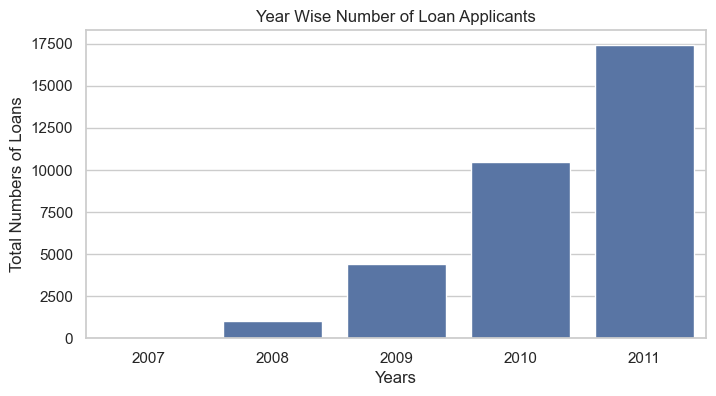

In [88]:
#Creating a countplot to show the year wise increasing amount of loans in lending clubs

plt.figure(figsize=(8,4))
sns.set(style="whitegrid")
ax=sns.countplot(x='year',data=df)
years = ['2007','2008','2009','2010','2011']
xpos=np.arange(len(years))
ax.set(xlabel='Years', ylabel='Total Numbers of Loans',title='Year Wise Number of Loan Applicants')
plt.xticks(xpos,years)
plt.show()

#### Observation -> We can see there is a Substantial growth took place between 2008-2011 in the number of loan applicants

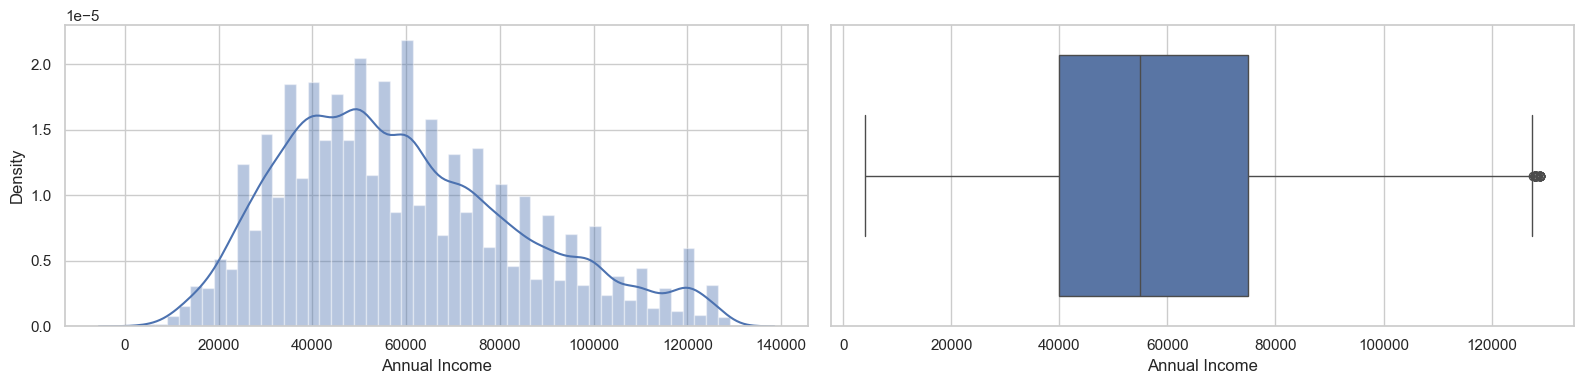

count     33342.000000
mean      59161.381715
std       25506.286639
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      129000.000000
Name: annual_inc, dtype: float64

In [89]:
# Annual income details
plt_graph(df, 'annual_inc')
df['annual_inc'].describe()

#### The Annual income of most if applicants lies between 40K-75K

In [90]:
print("Annual Income Average is ~ :", round(df['annual_inc'].mean(),0))

Annual Income Average is ~ : 59161.0


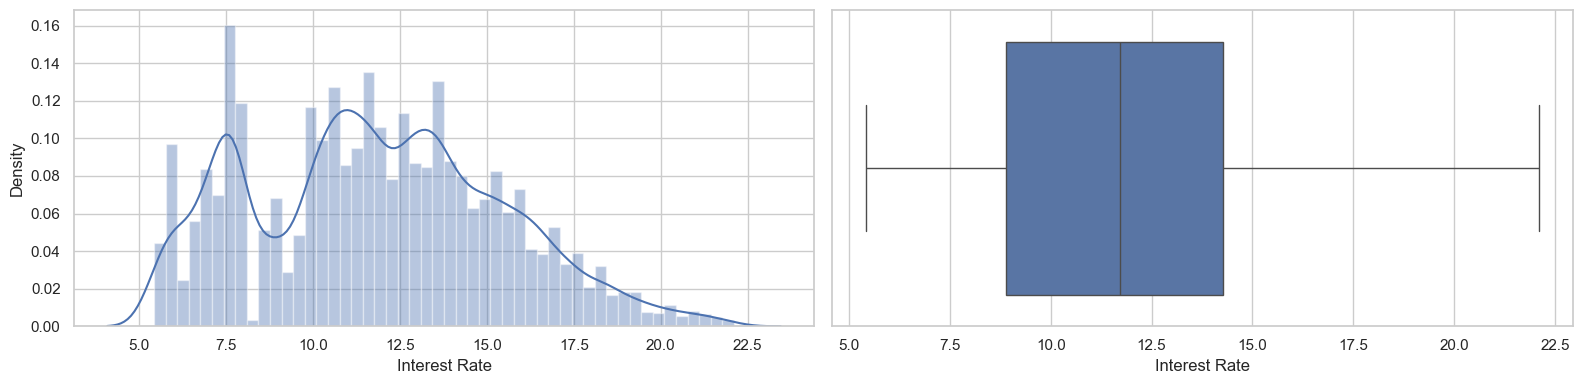

count    33342.000000
mean        11.817607
std          3.584497
min          5.420000
25%          8.900000
50%         11.710000
75%         14.270000
max         22.110000
Name: int_rate, dtype: float64

In [91]:
plt_graph(df, 'int_rate')
df['int_rate'].describe()

#### Most of the applicant's Rate Of Interest is in the range of 8%-14%
#### Average Rate of Interest of rate is 11.7%

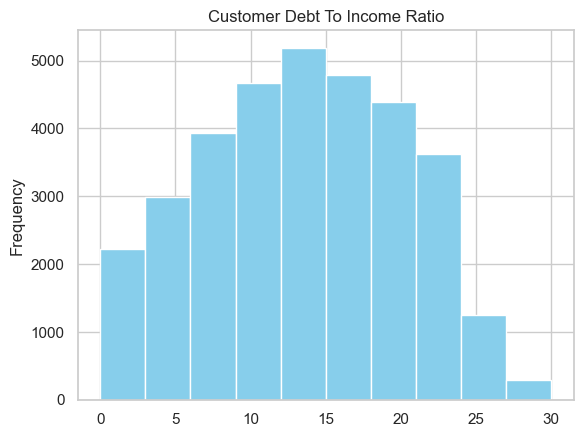

In [92]:
# Univariate analysis of DTI
plt.title('Customer Debt To Income Ratio')
plt.xlabel("DTI Ratio")
df.dti.plot.hist(color ="skyblue")
plt.show()


<Axes: xlabel='loan_status'>

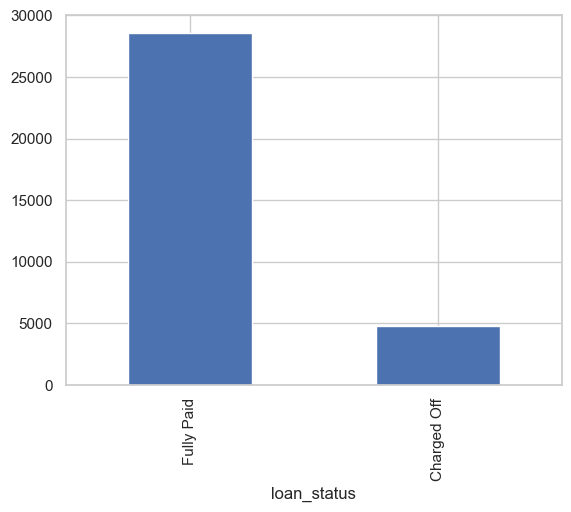

In [93]:
df['loan_status'].value_counts().plot.bar()

<Axes: xlabel='home_ownership'>

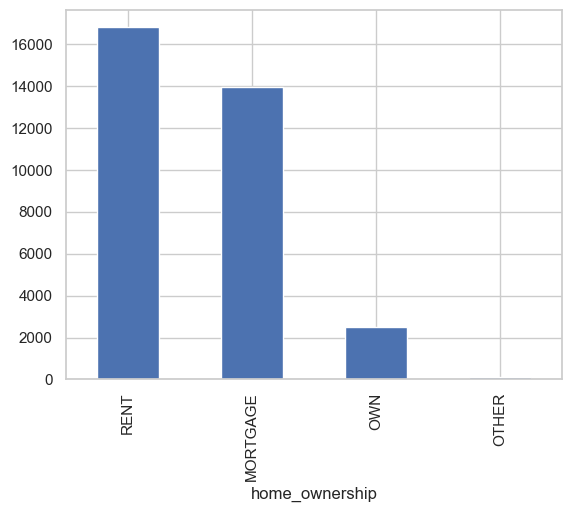

In [94]:
df.home_ownership.value_counts().plot.bar()

### Majority of applicants are either living on Rent or on Mortgage

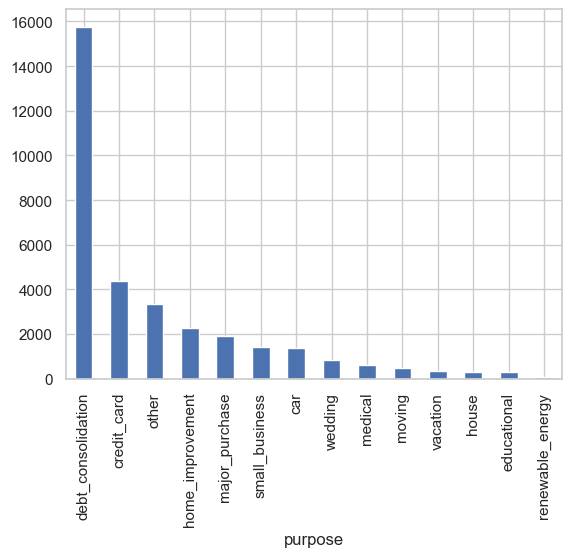

In [95]:
ax = df.purpose.value_counts().plot.bar()

#### Most of the loan applicants are for debt_consolidations.

##### The distribution of loan amount shows that the maximum loan range amount is between 5K-10K

<Axes: ylabel='count'>

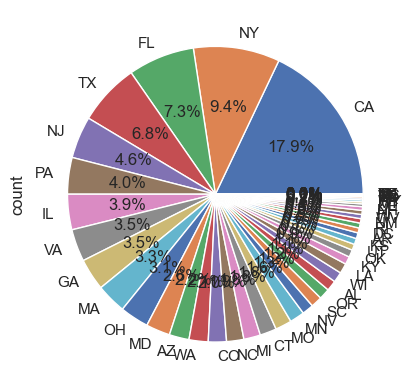

In [96]:
#State wise loan applicants
df['addr_state'].value_counts().plot(kind="pie",autopct='%1.1f%%')


#### Most of the Loan applicants are from California State

# Bivariate Analysis

In [97]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'loan_amnt_b',
       'annual_inc_b', 'int_rate_b', 'dti_b', 'year'],
      dtype='object')

In [98]:
#Intrest rate  against Charged off_Proportion with bins :
ivl = df.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack()
ivl['Total'] = ivl['Charged Off']+ ivl['Fully Paid']
ivl['Chargedoff_Proportion'] = ivl['Charged Off'] / ivl['Total']
ivl.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
int_rate_b,,,,
Very High (> 15),1702,4827,6529,0.260683
High (13 - 15),991,4880,5871,0.168796
Moderate (11 - 13),970,5700,6670,0.145427
Low (9 - 11),586,5039,5625,0.104178
Very Low (< 9),515,8132,8647,0.059558


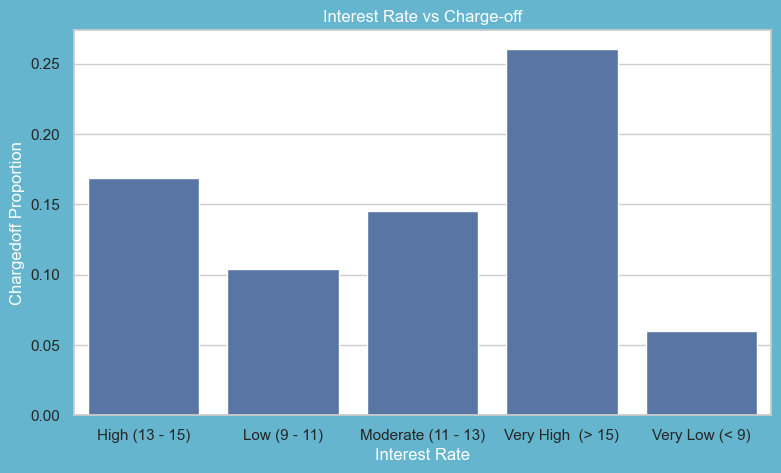

In [99]:
## pltting graph with interest rate bins (range)
fig, ax1 = plt.subplots(figsize=(9, 5),facecolor='c')
ax1.set_title('Interest Rate vs Charge-off',fontsize=12,color='w')
ax1=sea.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=ivl)
ax1.set_xlabel('Interest Rate',fontsize=12,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color = 'w')
plt.show()

### Observations:
#### interest rate less than 10% or very low has very less chances of charged off. Intrest rates are starting from minimun 5 %.
#### interest rate more than 16% or very high has good chnaces of charged off as compared to other category intrest rates.
#### Charged off proportion is increasing with higher intrest rates.


In [100]:
#Annual income against Charge off Proportion:

irvl = df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack()
irvl['Total'] = irvl['Charged Off']+ irvl['Fully Paid']
irvl['Chargedoff_Proportion'] = irvl['Charged Off'] / irvl['Total']
irvl.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
annual_inc_b,,,,
0 - 40k,1570,7333,8903,0.176345
50k - 60k,806,4494,5300,0.152075
40k - 50k,813,4621,5434,0.149614
60k - 70k,496,3338,3834,0.129369
70k - 80k,397,2867,3264,0.121630
80k - above,682,5925,6607,0.103224


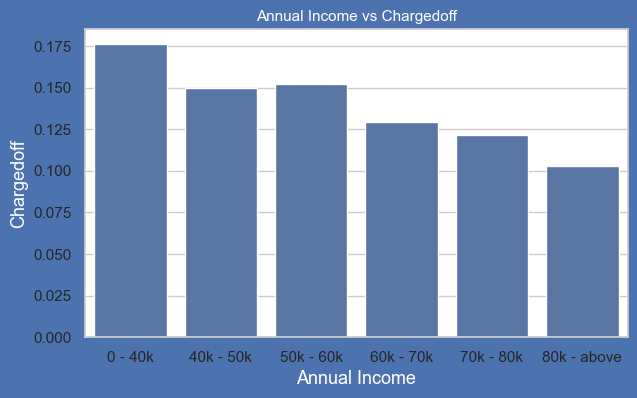

In [101]:
# Converting above in to bar plts for the data calculated above:
fig, axis1 = plt.subplots(figsize=(7, 4),facecolor='b')
axis1.set_title('Annual Income vs Chargedoff',fontsize=11,color = 'w')
axis1=sea.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=irvl)
axis1.set_ylabel('Chargedoff',fontsize=13,color = 'w')
axis1.set_xlabel('Annual Income',fontsize=13,color='w')
plt.show()


### Observations:
#### Income range 80000+  has less chances of charged off
#### Income range 0-20000 has high chances of charged off
#### Notice that with increase in annual income decreases the charged off proportion

In [102]:
#Bivariate Analysis of Home Ownership against Charge off proportion

hovl = df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack()
hovl['Total'] = hovl['Charged Off']+ hovl['Fully Paid']
hovl['Chargedoff_Proportion'] = hovl['Charged Off'] / hovl['Total']
hovl.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
home_ownership,,,,
OTHER,17,75,92,0.184783
RENT,2509,14286,16795,0.149390
OWN,359,2137,2496,0.143830
MORTGAGE,1879,12080,13959,0.134608


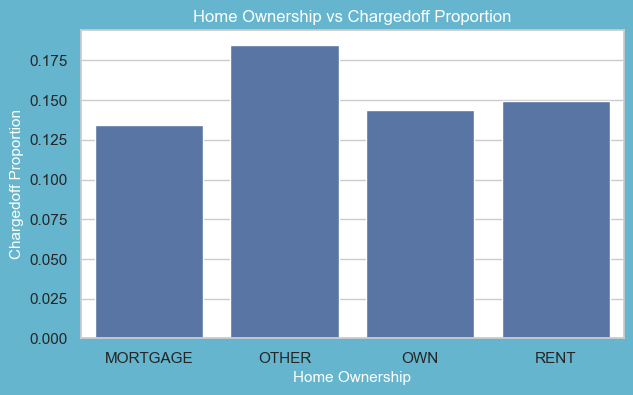

In [103]:
## pltting graph
fig, axis1 = plt.subplots(figsize=(7,4),facecolor='c')
axis1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=12,color='w')
axis1=sea.barplot(x='home_ownership', y='Chargedoff_Proportion', data=hovl)
axis1.set_xlabel('Home Ownership',fontsize=11,color='w')
axis1.set_ylabel('Chargedoff Proportion',fontsize=11,color = 'w')
plt.show()

### Observation:
#### Those who are not owning the home is having high chances of loan defaults.

In [319]:
#Bivariate Analysis on Purpose of loan against Charge off_Proportion

pvl = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack()
pvl['Total'] = pvl['Charged Off']+ pvl['Fully Paid']
pvl['Chargedoff_Proportion'] = pvl['Charged Off'] / pvl['Total']
pvl.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
purpose,,,,
small_business,384,1063,1447,0.265377
renewable_energy,16,68,84,0.190476
educational,48,239,287,0.167247
house,49,258,307,0.159609
other,539,2853,3392,0.158903
medical,95,510,605,0.157025
moving,79,433,512,0.154297
vacation,49,280,329,0.148936
debt_consolidation,2387,13671,16058,0.148649


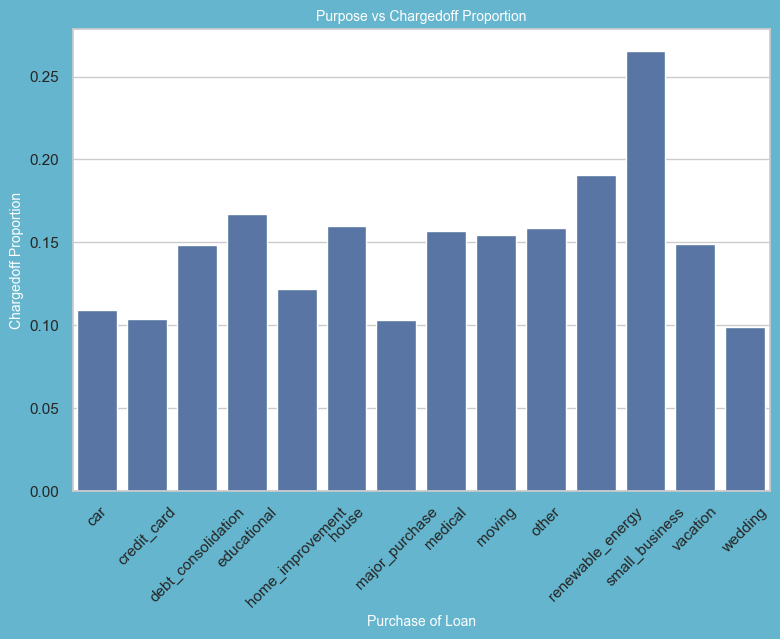

In [320]:
fig, axis1 = plt.subplots(figsize=(9, 6),facecolor='c')
axis1.set_title('Purpose vs Chargedoff Proportion',fontsize=10,color='w')
axis1=sea.barplot(x='purpose', y='Chargedoff_Proportion', data=pvl)
axis1.set_xlabel('Purchase of Loan',fontsize=10,color='w')
axis1.set_ylabel('Chargedoff Proportion',fontsize=10,color = 'w')
plt.xticks(rotation=45)
plt.show()

### Observation 
#### Those applicants who is having home loan is having low chances of loan defaults.
#### Those applicants having loan for small bussiness is having high chances for loan defaults.

In [321]:
#Debt To Income against charged off

dvl = df.groupby(['dti_b', 'loan_status']).loan_status.count().unstack()
dvl['Total'] = dvl['Charged Off']+ dvl['Fully Paid']
dvl['Chargedoff_Proportion'] = dvl['Charged Off'] / dvl['Total']
dvl.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
dti_b,,,,
Very High,1060,5533,6593,0.160777
High,972,5262,6234,0.155919
Moderate,1005,5957,6962,0.144355
Low,820,5423,6243,0.131347
Very Low,967,6956,7923,0.122050


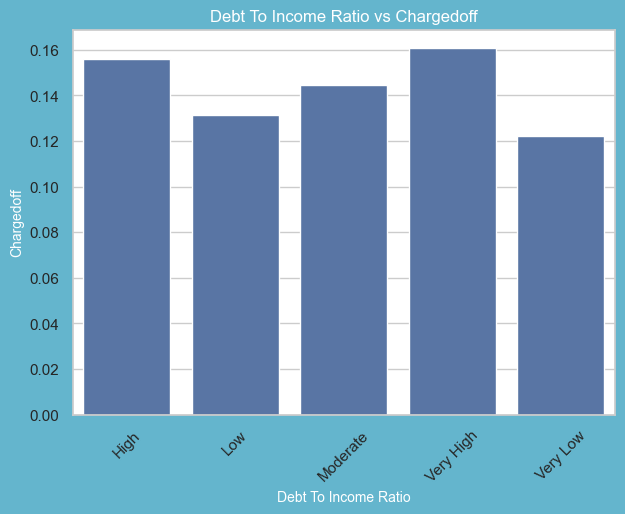

In [377]:
### pltting graph - Debt To Income against charged off
fig, axis1 = plt.subplots(figsize=(7, 5),facecolor='c')
axis1.set_title('Debt To Income Ratio vs Chargedoff',fontsize=12,color='w')
axis1=sea.barplot(x='dti_b', y='Chargedoff_Proportion', data=dvl)
axis1.set_xlabel('Debt To Income Ratio',fontsize=10,color='w')
axis1.set_ylabel('Chargedoff',fontsize=10,color = 'w')
plt.xticks(rotation=45)
plt.show()

### Observation:
#### - High DTI value  having high risk of defaults
#### - Lower the DTI having low chances of loan defaults

In [323]:
# Bankruptcies Record against Chargedoff_Proportion
prbvl = df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
prbvl['Total'] = prbvl['Charged Off']+ prbvl['Fully Paid']
prbvl['Chargedoff_Proportion'] = prbvl['Charged Off'] / prbvl['Total']
prbvl.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,316,1151,1467,0.215406
0,0.0,4506,27977,32483,0.138719


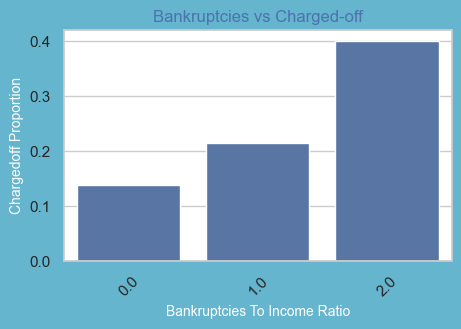

In [324]:
# pltting graph
fig, axis1 = plt.subplots(figsize=(5, 3),facecolor='c')
axis1.set_title('Bankruptcies vs Charged-off',fontsize=12,color='b')
axis1=sea.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=prbvl)
axis1.set_xlabel('Bankruptcies To Income Ratio',fontsize=10,color='w')
axis1.set_ylabel('Chargedoff Proportion',fontsize=10,color = 'w')
plt.xticks(rotation=45)
plt.show()

### Observations:
#### - Bankruptcies with 2 is having high impact on loan defaults
#### - Lower the Bankruptcies lower the risk

In [325]:
# #Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -

iyvl = df.groupby(['year', 'loan_status']).loan_status.count().unstack()
iyvl['Total'] = iyvl['Charged Off']+ iyvl['Fully Paid']
iyvl['Chargedoff_Proportion'] = iyvl['Charged Off'] / iyvl['Total']
iyvl.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
year,,,,
2007,2,5,7,0.285714
2008,165,890,1055,0.156398
2011,2742,15054,17796,0.154080
2010,1351,9288,10639,0.126986
2009,564,3894,4458,0.126514


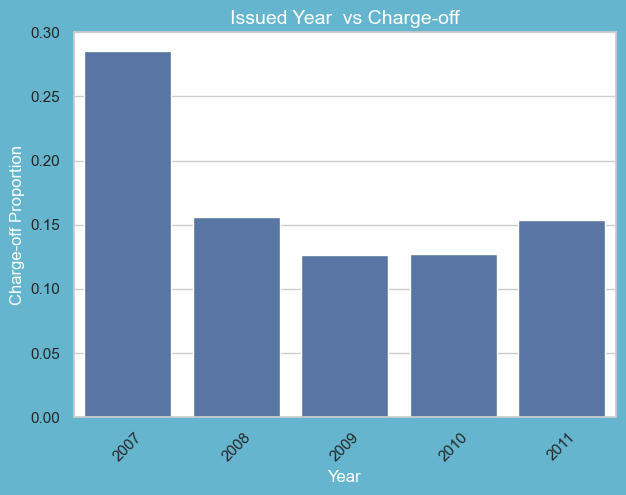

In [326]:
# pltting Graph
fig, axis1 = plt.subplots(figsize=(7, 5),facecolor='c')
axis1.set_title('Issued Year  vs Charge-off',fontsize=14,color='w')
axis1=sea.barplot(x='year', y='Chargedoff_Proportion', data=iyvl)
axis1.set_xlabel('Year',fontsize=12,color='w')
axis1.set_ylabel('Charge-off Proportion',fontsize=12,color = 'w')
plt.xticks(rotation=45)
plt.show()

### 2007 is having highest loan defaults
### 2009 is having lowest loan defaults


In [327]:
#Grade against Chargedoff_Proportion

gvl = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
gvl['Total'] = gvl['Charged Off']+ gvl['Fully Paid']
gvl['Chargedoff_Proportion'] = gvl['Charged Off'] / gvl['Total']
gvl.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,59,118,177,0.333333
5,F,234,513,747,0.313253
4,E,571,1571,2142,0.266573
3,D,974,3505,4479,0.217459
2,C,1196,5788,6984,0.171249
1,B,1250,9136,10386,0.120354
0,A,540,8500,9040,0.059735


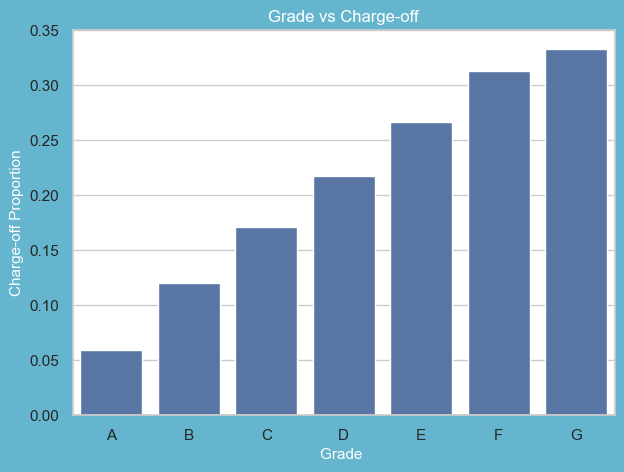

In [328]:
# pltting graph for Grade against Chargedoff_Proportion
fig, axis1 = plt.subplots(figsize=(7, 5),facecolor='c')
axis1.set_title('Grade vs Charge-off',fontsize=12,color='w')
axis1=sea.barplot(x='grade', y='Chargedoff_Proportion', data=gvl)
axis1.set_xlabel('Grade ',fontsize=11,color='w')
axis1.set_ylabel('Charge-off Proportion',fontsize=11,color = 'w')
plt.show()

### Observations :
- The Loan applicants with loan Grade G is having highest Loan Defaults.
- The Loan applicants with loan A is having lowest Loan Defaults.

### Interest Rate Vs Employee Grades:->

In [329]:
grade_group = df.groupby('grade')
grade_group['int_rate'].median()

grade
A     7.49
B    10.99
C    13.49
D    15.62
E    17.19
F    19.13
G    20.48
Name: int_rate, dtype: float64

In [330]:
emp_group = df.groupby('emp_length')
emp_group['loan_amnt'].median()

emp_length
1      8000.0
10    10000.0
2      8000.0
3      8887.5
4      9000.0
5      9000.0
6      9950.0
7     10000.0
8      9600.0
9     10000.0
Name: loan_amnt, dtype: float64

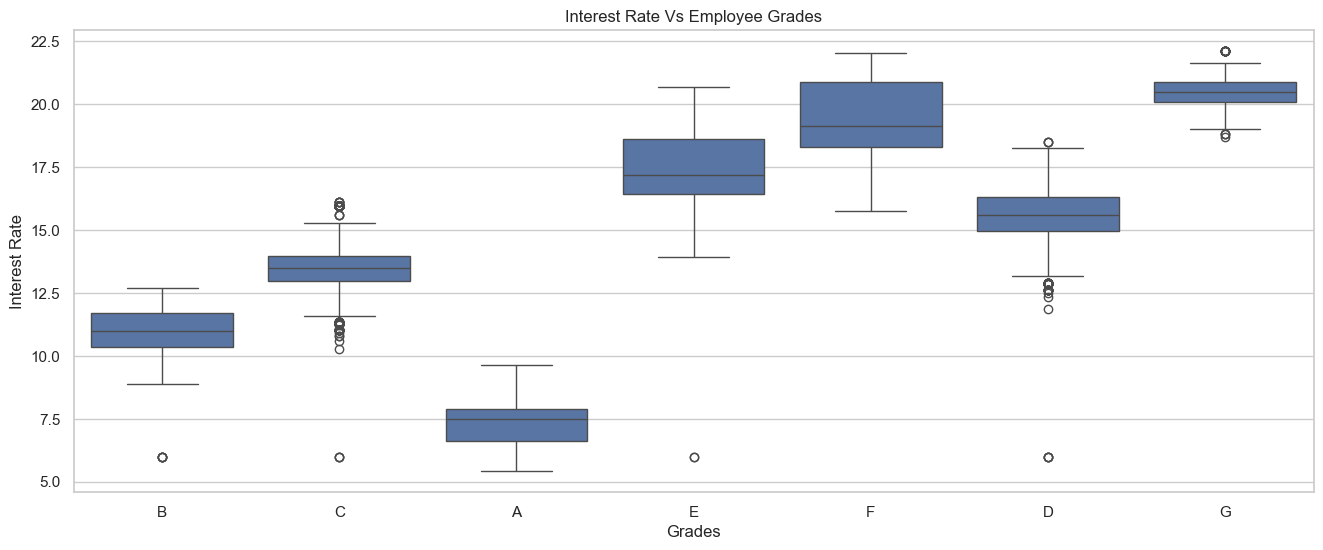

In [331]:
# pltting Graph
plt.figure(figsize=(16,6))
ax=sns.boxplot(x='grade',y='int_rate',data=df,)
ax.set(xlabel='Grades', ylabel='Interest Rate',title='Interest Rate Vs Employee Grades')
plt.show()

##### Higher the grade higher the interest rate 
##### A Grade is having minimum interest rate, whereas G is having highest interest rate

In [332]:
df.columns
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,loan_amnt_b,annual_inc_b,int_rate_b,dti_b,year
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,10,RENT,24000.0,...,credit_card,860xx,AZ,27.65,0.0,0 - 5K,0 - 40k,Low,Very High,2011
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,1,RENT,30000.0,...,car,309xx,GA,1.00,0.0,0 - 5K,0 - 40k,Very High,Very Low,2011
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,10,RENT,12252.0,...,small_business,606xx,IL,8.72,0.0,0 - 5K,0 - 40k,Very High,Low,2011
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,10,RENT,49200.0,...,other,917xx,CA,20.00,0.0,5K - 10K,40k - 50k,High,High,2011
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,3,RENT,36000.0,...,wedding,852xx,AZ,11.20,0.0,0 - 5K,0 - 40k,Very Low,Low,2011


### Correlation Analysis

In [333]:
# Taking data frame for finding correlation
corr_df = df

Text(0, 0.5, 'Loan Amount')

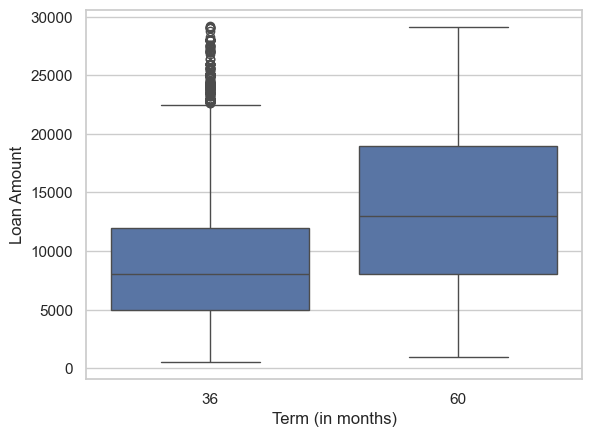

In [334]:
ax = sea.boxplot(x = 'term', y = 'loan_amnt', data=corr_df)
ax.set_xlabel('Term (in months)')
ax.set_ylabel('Loan Amount')

##### From the above graph we can see that if term is propotional to loan amount, if term increases, loan amount increases

Text(0, 0.5, 'Interest Rate (%)')

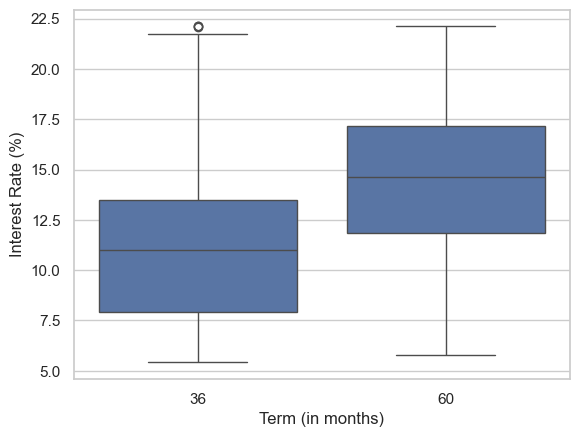

In [335]:
# pltting correlation graph
ax = sea.boxplot(x = 'term', y = 'int_rate', data=corr_df)
ax.set_xlabel('Term (in months)')
ax.set_ylabel('Interest Rate (%)')

#### Observation: We can see in above graph, if term increases the Interest rate increases

In [336]:
#Dropping columns for building correlations
drop_cols = ['grade','zip_code', 'funded_amnt','funded_amnt_inv','verification_status','addr_state','home_ownership','loan_amnt_b','annual_inc_b','int_rate_b','dti_b','purpose','loan_status']
corr_df = corr_df.drop(columns=drop_cols)

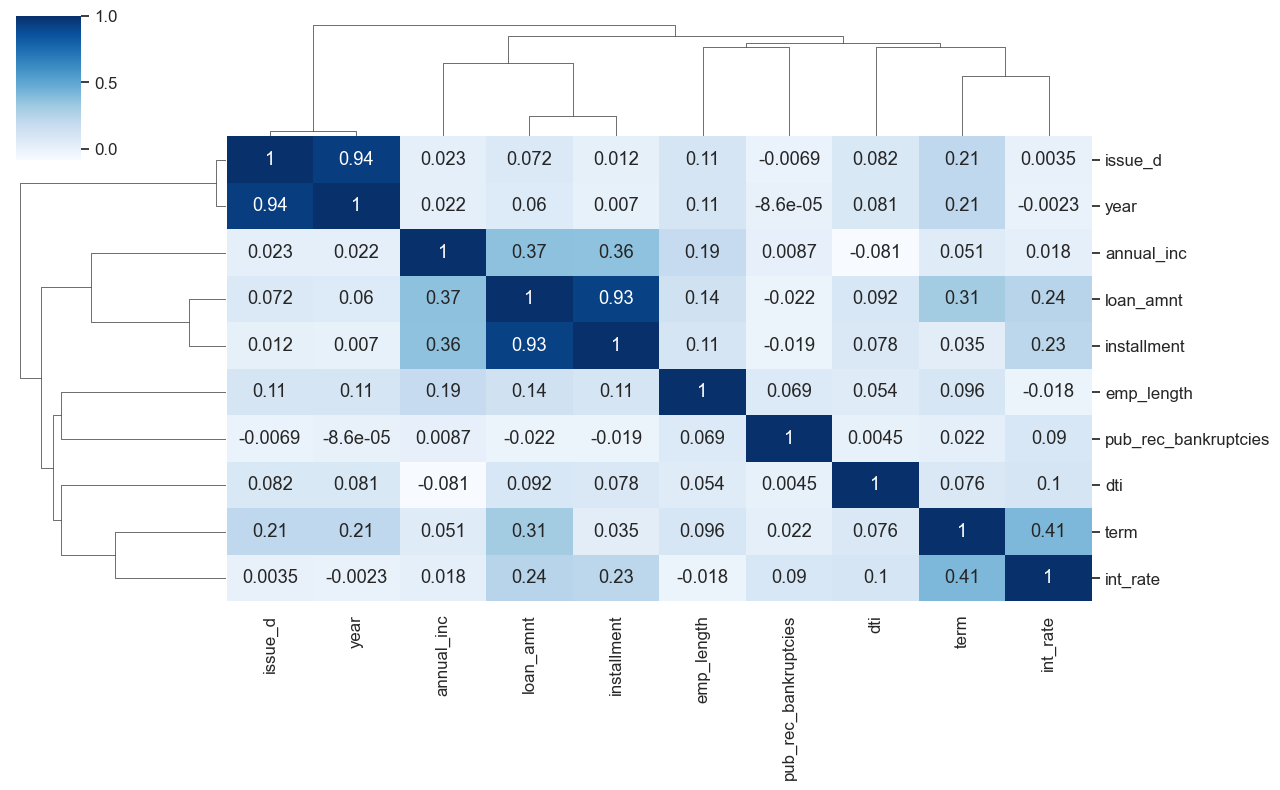

In [337]:
corr = corr_df.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(13, 8), cmap="Blues")
plt.show()


### Positive Correlation:

- Term has a positive correlation with "Interest Rate" and "Loan Amount"
- Annual Income has a strong correlation with "Loan Amount" and "Installements"


### Negative Correlation:

- "Annual income" has a negative correlation with "DTI"
- "Loan Amount" has negative correlation with "Bankrupticies"
